# Installation

In [1]:
%cd ..
!ls

/Users/ivan_kharitonov/Google Drive/ML_eng_course/space_junk_simulator
CMakeLists.txt    cmake-build-debug lib               test
README.md         docs              setup.py
bin               examples          src


Cpu version

In [2]:
!python3 setup.py

Build CPU version
['/src/cpu/cpu_solver.cpp', '/src/python_package/py_wrapper_cpu.cpp', '/src/model.cpp']


Gpu version

In [3]:
!python3 setup.py --GPU=True

Build GPU version
['/src/cpu/cpu_solver.cpp', '/src/python_package/py_wrapper_cpu.cpp', '/src/model.cpp']
Traceback (most recent call last):
  File "setup.py", line 74, in <module>
    gpu_version_build(cur_path)
  File "setup.py", line 47, in gpu_version_build
    '-fPIC'])
  File "/Users/ivan_kharitonov/anaconda3/lib/python3.6/subprocess.py", line 287, in call
    with Popen(*popenargs, **kwargs) as p:
  File "/Users/ivan_kharitonov/anaconda3/lib/python3.6/subprocess.py", line 729, in __init__
    restore_signals, start_new_session)
  File "/Users/ivan_kharitonov/anaconda3/lib/python3.6/subprocess.py", line 1364, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'nvcc': 'nvcc'


# Simple object example

In [4]:
import numpy as np
x_init = np.array([25217.424362950926], dtype = np.float64)
y_init = np.array([-496457.41386781185], dtype = np.float64)
z_init = np.array([ 650671.2495281389], dtype = np.float64)

vx_init = np.array([0.0014348032818816137], dtype = np.float64)
vy_init = np.array([-0.00088002800475806], dtype = np.float64)
vz_init = np.array([-0.0007270622299984097], dtype = np.float64)

month = 10*3600*24*31
simulation_time = month
print('Simulation_time =', simulation_time, 'secs')

Simulation_time = 26784000 secs


## cpu

In [5]:
x0, y0, z0, vx0, vy0, vz0, x0 = x_init, y_init, z_init, vx_init, vy_init, vz_init, x_init

In [6]:
from src.python_package.space_junk_simulator import space_simulator
sim_cpu = space_simulator(gpu = False)

In [7]:
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_cpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(10), timestep = float(1.0))

print('Initial', x0, y0, z0, vx0, vy0, vz0, '\n')
print('End', x_res, y_res, z_res, vx_res, vy_res, vz_res)

Initial [25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00072706] 

End [24290.67118081] [-478212.08092972] [626758.37559678] [-187.69167579] [3695.12708449] [-4842.94092718]


In [8]:
import numpy as np
from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline


def simulate(sim, 
             x0, y0, z0, 
             vx0, vy0, vz0, 
             simulation_steps=10, time_step=1.0, plot_result=False):
    simulation_history = []
    objects_steps = []
    if plot_result:
        plt.figure(figsize=(12,12))
        ax = plt.axes(projection='3d')
    for simulation_step in tqdm_notebook(range(simulation_steps)):

        x_res, y_res, z_res, vx_res, vy_res, vz_res = \
        sim.run(x0, y0, z0, vx0, vy0, vz0, 
                    x0.size,vzsteps= int(1), timestep = float(time_step))


        x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res
        if plot_result:
            ax.scatter3D( x_res, y_res, z_res)
    

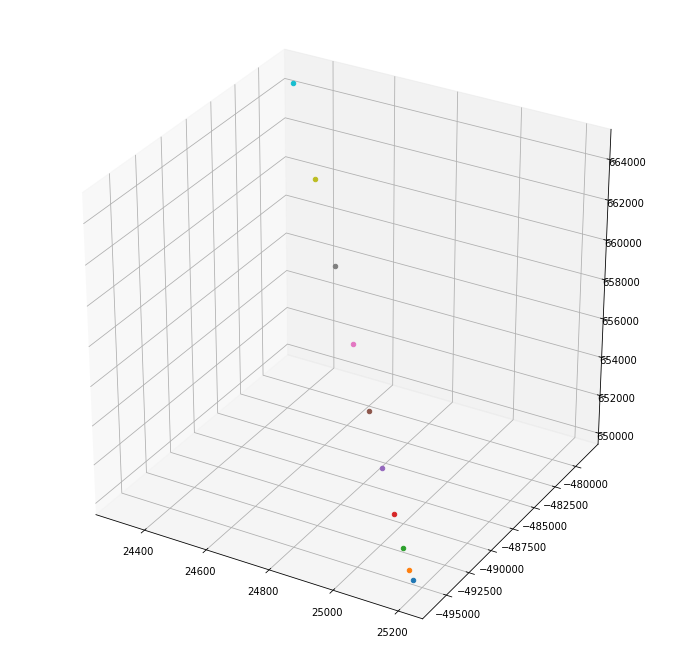

In [9]:
simulate(sim_cpu, x0, y0, z0, vx0, vy0, vz0, 
         simulation_steps=10, time_step=1.0, plot_result=True)

## gpu

In [10]:
x0, y0, z0, vx0, vy0, vz0, x0 = x_init, y_init, z_init, vx_init, vy_init, vz_init, x_init

In [11]:
from src.python_package.space_junk_simulator import space_simulator
sim_gpu = space_simulator(gpu = True)

OSError: dlopen(/Users/ivan_kharitonov/Google Drive/ML_eng_course/space_junk_simulator/src/python_package/python_package_gpu.so, 6): image not found

In [ ]:
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_gpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(10), timestep = float(1.0))

print('Initial', x0, y0, z0, vx0, vy0, vz0, '\n')
print('End', x_res, y_res, z_res, vx_res, vy_res, vz_res)

In [ ]:
simulate(sim_gpu, x0, y0, z0, vx0, vy0, vz0, 
         simulation_steps=10, time_step=1.0, plot_result=True)

# Object bunch

In [12]:
from src.utils import *

In [13]:
N = 21000

space_objects = generate_object_states(N)

    
import pandas as pd
a = pd.DataFrame(space_objects).values

object_id = a[:, 0]
x_batch_init = a[:, 6].astype(np.float64)
y_batch_init = a[:, 7].astype(np.float64)
z_batch_init = a[:, 8].astype(np.float64)

vx_batch_init = a[:, 3].astype(np.float64)
vy_batch_init = a[:, 4].astype(np.float64)
vz_batch_init = a[:, 5].astype(np.float64)

## cpu

In [14]:
x0, y0, z0, vx0, vy0, vz0, x0 = \
x_batch_init, y_batch_init, z_batch_init, vx_batch_init, vy_batch_init, vz_batch_init, x_batch_init

In [15]:
from src.python_package.space_junk_simulator import space_simulator
sim_cpu = space_simulator(gpu = False)

In [16]:
%%time
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_cpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(1), timestep = float(0.1))

CPU times: user 33.3 ms, sys: 4.17 ms, total: 37.5 ms
Wall time: 36.2 ms


In [18]:
simulate(sim_cpu, x0, y0, z0, vx0, vy0, vz0, 
         simulation_steps=100, time_step=0.1)

## gpu

In [ ]:
x0, y0, z0, vx0, vy0, vz0, x0 = \
x_batch_init, y_batch_init, z_batch_init, vx_batch_init, vy_batch_init, vz_batch_init, x_batch_init

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim_gpu = space_simulator(gpu = True)

In [ ]:
%%time
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim_gpu.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(1), timestep = float(0.1))

In [ ]:
simulation_time 

In [ ]:
simulate(sim_gpu, x0, y0, z0, vx0, vy0, vz0, 
        simulation_steps=36600, time_step=0.1)

In [ ]:
import ctypes
so_gpu_path = "/home/ipharitonov/space_junk_simulator/src/python_package/python_package_gpu.so"
solver_gpu = ctypes.CDLL(so_gpu_path)

In [ ]:
!nvcc -c space_junk_simulator/src/gpu/gpu_solver.cu -o space_junk_simulator/src/gpu/gpu_solver.o -Xcompiler -fPIC

In [ ]:
solver_gpu.solve_cpu

# Тест напрямую

In [ ]:
import os
import matplotlib.pyplot as plt
import subprocess
import json

In [ ]:
#run binary
FNULL = open(os.devnull, 'w')    #use this if you want to suppress output to stdout from the subprocess
args = "../bin/spacejunk_debug_cpu.exe ../source/cfg.txt output.txt"
subprocess.call(args, stdout=FNULL, stderr=FNULL, shell=False)

In [ ]:
#set cfg.txt
cfg = {
    "objects" : [
        {
            "x" : 0.0, 
            "y" : 7645200.0,
            "z" : 0.0,
            "vx" : 7220.0,
            "vy" : 0.0,
            "vz" : 0.0,
            "size" : 1.0
        }
    ],
    "time" : 0.0,
    "dt" : 1.0,
    "maxSteps" : 1000.0,
    "steps" : 1000,
    "logObjects" : (0)
}
with open("cfg.txt", "w") as f:
    f.write(json.dumps(cfg))

In [ ]:
!ls

In [ ]:
args = " cfg.txt output_2.txt"
subprocess.call(args, stdout=FNULL, stderr=FNULL, shell=False)

In [ ]:
with open("output_2.txt", "r") as res:
    l = res.read()
    print(l)